# Linear Regression with Scikit Learn - Machine Learning with Python

In [5]:
#creamos un entorno virtual para no descargar todas las librerias sobre nuestro compu
!python -m venv machine_learning

para poder usar el venv de python (y si estás en VS Code) debes ir a la parte superior derecha del ipynb y seleccionar el kernel que acabaste de crear, en mi caso su nombre es "machine_learning"

In [ ]:
#Instalamos las librerias necesarias (esto te recomiendo hacerlo por la terminal)
!pip install pandas --quiet
!pip install jovian

In [11]:
#traemos las librerias que tenemos que usar
from urllib.request import urlretrieve #para descargar los datos de la pagina
import pandas as pd #para crear el dataframe que tendra los datos dentro de el


In [12]:
#descargamos los datos
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, './medical.csv')

('./medical.csv', <http.client.HTTPMessage at 0x2b3530a8410>)

In [13]:
#ahora vamos a crear el dataframe en pandas utilizando el archivo descargado para verlo y poder analizarlo.
medical_df = pd.read_csv('./medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
# Si quieres revisar los tipos de dato del dataframe
medical_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


IMPORTANTE!

el BMI es una unidad muy utilizada que significa "Body Mass Index" o "indice de masa corporal" y su formula es la siguiente:

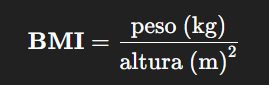

y el ejemplo sería algo como:

Una persona de 70 kg y 1.75 m:

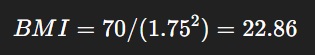

In [15]:
# Entendamos un poco como estan los datos numericos
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Analicemos los datos de la tabla

- A simple vista vemos valores razonables en las columnas como que no hay un minimo de edad negativo ni la cantidad de niños.
- tambien vemos que la desviación estándar es bastante alta en "charges" debido a la diferencia abismal entre el minimo y el maximo que hay en esta columna.

# Exploración, analisis y visualización de los datos

Vamos a ver como se distribuyen los datos en algunas de las columnas del dataset y como se relacionan estos datos con la columna "Charges" y otras columnas.

Usaremos las librerias de Matplotlib, Seaborn y Plotly para la visualización de los datos.

Aqui nos dejan unos tutoriales para usar estas librerías:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [ ]:
# Instalamos las librerias (recomendado hacerlo por la terminal)
!pip install plotly matplotlib seaborn
!python -m pip install -U nbformat

In [11]:
# Instalamos las librerias (recomendado en el mismo entorno del kernel, aqui mismo)
!python -m pip install -U ipython

In [16]:
#importamos estas nuevas librerias para trabajar con ellas

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

#la siguiente linea le dice a jupyter que abra las graficas dentro del notebook donde estamos trabajando justo debajo de la celda donde las generamos.
%matplotlib inline

In [17]:
#ahora, estos van a ser las configuraciones que mejoran el estilo y las fuentes de nuestros gráficos.

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Edad (columna age)

La edad es una columna numérica. La edad mínima en el conjunto de datos es 18 años y la máxima 64. Por lo tanto, podemos visualizar la distribución de la edad mediante un histograma con 47 intervalos (uno por cada año) y un diagrama de caja. Usaremos plotly para que el gráfico sea interactivo, pero puedes crear gráficos similares con Seaborn.

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
#tuve que hacer el siguiente comando e instalar el nbformat version 4.3.0 porque el nuevo 5.10 al parecer es muy nuevo para fig.show() que utilizamos mas adelante

import nbformat
print(nbformat.__version__)

import sys, subprocess
print(sys.executable)

subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "nbformat", "ipython", "plotly"])

In [28]:
#estas son las versiones que usé

print("nbformat", nbformat.__version__)
import plotly
print("plotyly", plotly.__version__)
import IPython, nbformat
print("ipython",IPython.__version__)

nbformat 4.3.0
plotyly 6.5.2
ipython 9.10.0


In [21]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

# minuto 13:49 de youtube

https://jovian.ai/aakashns/python-sklearn-linear-regression
https://www.youtube.com/watch?v=hDKCxebp88A